In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ETL

In [351]:
filename = ("houses_dict.csv")
df = pd.read_csv(filename)

In [352]:
df.head()

,quartos,m2_quadrado,garagem,banheiros,direto com o proprietario,preço,cidade,bairro,link
0,4.0,120.0,2.0,3.0,1,R$ 290.000,Natal,Tirol,https://rn.olx.com.br/rio-grande-do-norte/imov...
1,3.0,200.0,2.0,3.0,1,R$ 279.999,Natal,Neópolis,https://rn.olx.com.br/rio-grande-do-norte/imov...
2,1.0,130.0,1.0,1.0,0,R$ 280.000,Natal,Neópolis,https://rn.olx.com.br/rio-grande-do-norte/imov...
3,4.0,114.0,1.0,2.0,0,R$ 260.000,Natal,Nossa Senhora de Nazaré,https://rn.olx.com.br/rio-grande-do-norte/imov...
4,3.0,85.0,1.0,2.0,1,R$ 245.000,Natal,Planalto,https://rn.olx.com.br/rio-grande-do-norte/imov...


In [353]:
df.describe()

,quartos,m2_quadrado,garagem,banheiros,direto com o proprietario
count,248.000000,200.000000,224.000000,248.000000,250.000000
mean,2.911290,2905.290000,1.875000,2.157258,0.344000
std,0.863212,19729.734418,0.879513,0.966791,0.475994
min,1.000000,10.000000,1.000000,1.000000,0.000000
25%,2.000000,110.000000,1.000000,2.000000,0.000000
50%,3.000000,154.500000,2.000000,2.000000,0.000000
75%,3.000000,200.000000,2.000000,3.000000,1.000000
max,5.000000,200000.000000,5.000000,5.000000,1.000000


In [354]:
df = df.drop_duplicates()

In [355]:
df = df.dropna()

In [356]:
df = df.drop(columns=["link"])
df = df.drop(columns=["cidade"])

In [357]:
if df["preço"].dtype != "int64":
    df["preço"] = df["preço"].str.replace("R$", "", regex=False)
    df["preço"] = df["preço"].str.replace(".", "", regex=False)
    df["preço"] = df["preço"].astype(int)

In [358]:
# mean = df["m2_quadrado"].mean()
# std = df["m2_quadrado"].std()
# df = df[(df["m2_quadrado"] > mean - 1 * std) & (df["m2_quadrado"] < mean + 1 * std)]


In [359]:
# df = df[(df["m2_quadrado"]) <= 1000]
Q1 = df["m2_quadrado"].quantile(0.25)
Q3 = df["m2_quadrado"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 3.5 * IQR
upper_bound = Q3 + 3.5 * IQR

df = df[(df["m2_quadrado"] >= lower_bound) & (df["m2_quadrado"] <= upper_bound)]

In [360]:
df["preco_por_m2"] = df["preço"] / df["m2_quadrado"]

In [361]:
df.describe()

,quartos,m2_quadrado,garagem,banheiros,direto com o proprietario,preço,preco_por_m2
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,2.917127,163.646409,1.900552,2.143646,0.243094,216599.486188,1663.597395
std,0.829179,75.330065,0.830696,0.955293,0.430141,47680.126698,1310.370230
min,1.000000,10.000000,1.000000,1.000000,0.000000,150000.000000,444.000000
25%,2.000000,110.000000,1.000000,2.000000,0.000000,180000.000000,1066.666667
50%,3.000000,152.000000,2.000000,2.000000,0.000000,215000.000000,1367.521368
75%,3.000000,200.000000,2.000000,3.000000,0.000000,260000.000000,1800.000000
max,5.000000,500.000000,5.000000,5.000000,1.000000,300000.000000,15000.000000


In [362]:
df.head()

,quartos,m2_quadrado,garagem,banheiros,direto com o proprietario,preço,bairro,preco_por_m2
0,4.0,120.0,2.0,3.0,1,290000,Tirol,2416.666667
1,3.0,200.0,2.0,3.0,1,279999,Neópolis,1399.995000
2,1.0,130.0,1.0,1.0,0,280000,Neópolis,2153.846154
3,4.0,114.0,1.0,2.0,0,260000,Nossa Senhora de Nazaré,2280.701754
4,3.0,85.0,1.0,2.0,1,245000,Planalto,2882.352941


In [363]:
statitics_region = df.groupby("bairro")["preço"].agg(["mean", "median", "count"]).reset_index()

In [364]:
statitics_region

,bairro,mean,median,count
0,Alecrim,225400.000000,220000.0,5
1,Areia Preta,220000.000000,220000.0,1
2,Barro Vermelho,200000.000000,200000.0,3
3,Bom Pastor,300000.000000,300000.0,2
4,Candelária,208888.888889,200000.0,9
5,Capim Macio,227300.000000,220000.0,10
6,Cidade Alta,225000.000000,225000.0,2
7,Cidade da Esperança,184000.000000,160000.0,12
8,Dix-Sept Rosado,225000.000000,225000.0,2
9,Felipe Camarão,195000.000000,155000.0,5


In [365]:
correlations = df.select_dtypes(include=["number"]).corr()

In [366]:
correlations

,quartos,m2_quadrado,garagem,banheiros,direto com o proprietario,preço,preco_por_m2
quartos,1.000000,0.416492,0.294462,0.583216,0.119104,0.218585,-0.156412
m2_quadrado,0.416492,1.000000,0.529099,0.306194,0.194010,0.201027,-0.566824
garagem,0.294462,0.529099,1.000000,0.158118,0.052485,0.107333,-0.264913
banheiros,0.583216,0.306194,0.158118,1.000000,0.076788,0.259808,-0.163412
direto com o proprietario,0.119104,0.194010,0.052485,0.076788,1.000000,-0.100442,-0.001877
preço,0.218585,0.201027,0.107333,0.259808,-0.100442,1.000000,0.103213
preco_por_m2,-0.156412,-0.566824,-0.264913,-0.163412,-0.001877,0.103213,1.000000


Text(0.5, 0, 'Preço')

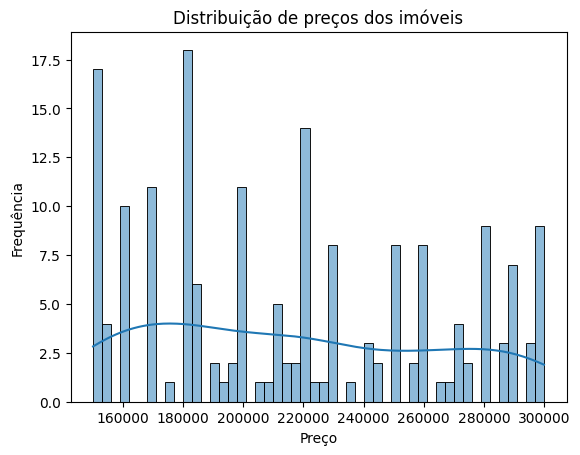

In [367]:
sns.histplot(df["preço"], bins=50, kde=True)
plt.title("Distribuição de preços dos imóveis")
plt.ylabel("Frequência")
plt.xlabel("Preço")

Text(0.5, 1.0, 'Preço por número de quartos')

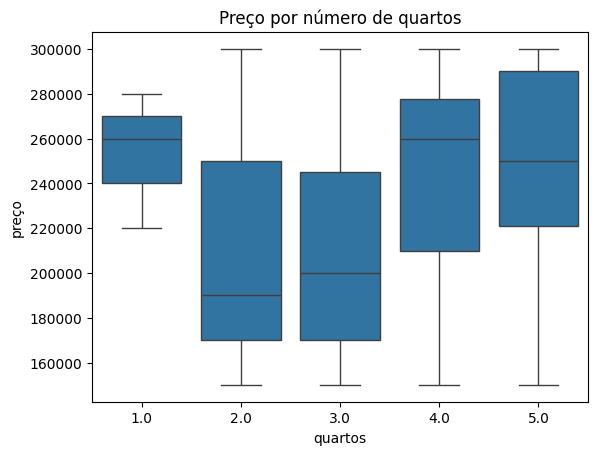

In [368]:
sns.boxplot(x="quartos", y="preço", data=df)
plt.title("Preço por número de quartos")

Text(0.5, 1.0, 'Relação entre área e preço')

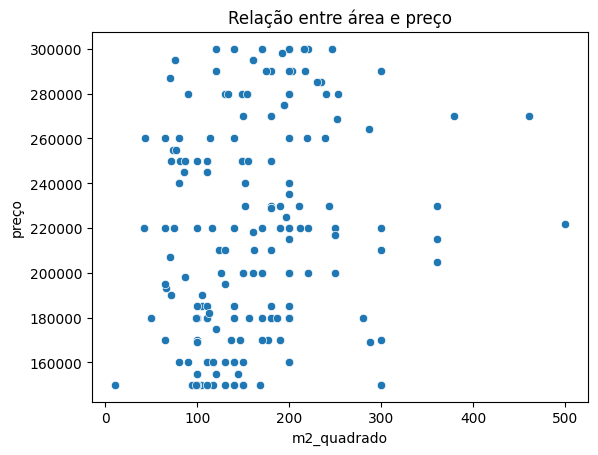

In [369]:
sns.scatterplot(x="m2_quadrado", y="preço", data=df)
plt.title("Relação entre área e preço")

# ML Linear Regression

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [384]:
# encoder = OneHotEncoder(sparse_output=False)
# encoded_bairros = encoder.fit_transform(df[["bairro"]])

# df_encoded = pd.DataFrame(encoded_bairros, columns=encoder.get_feature_names_out(["bairro"]))

# df_final = pd.concat([df, df_encoded], axis=0)
# df_final = df_final.drop(columns=["bairro"])

df_final = pd.get_dummies(df, columns=["bairro"], prefix=["bairro"])

In [410]:
x = df_final.drop(columns=["preço"])
y = df_final["preço"]

In [387]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [394]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 33198.49108886116
MSE 1852410185.2181737
43039.6350497791


#ML Random Forest Regressor

In [395]:
from sklearn.ensemble import RandomForestRegressor

In [398]:
rfr = RandomForestRegressor(n_estimators=100, random_state=33)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [399]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 15758.978648648648
MSE 473077412.30520266
21750.342808912294


In [424]:
casa1=pd.DataFrame({
    'quartos': [3],
    'm2_quadrado': [180],
    'garagem': [2],
    'banheiros': [2],
    'direto com o proprietario': [0],
    'bairro': "Neópolis"
})

casa1 = pd.get_dummies(casa1, columns=["bairro"], prefix=["bairro"])
casa1 = casa1.reindex(columns=x_train.columns, fill_value=0)

In [425]:
rfr.predict(casa1)

array([170215.92])